# xarray compatibility

**scmdata** allows datat to be exported to xarray. This makes it easy to use xarray's many helpful features, most of which are not natively provided in scmdata.

In [1]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
from scmdata import ScmRun

In [2]:
def get_data(years, n_ensemble_members, end_val, rand_pct):
    return (np.arange(years.shape[0]) / years.shape[0] * end_val)[:, np.newaxis] * (
        rand_pct * np.random.random((years.shape[0], n_ensemble_members)) + 1
    )

In [3]:
# NBVAL_IGNORE_OUTPUT
years = np.arange(1750, 2500 + 1)
variables = ["gsat", "gmst"]
n_variables = len(variables)
n_ensemble_members = 100


start = ScmRun(
    np.hstack(
        [
            get_data(years, n_ensemble_members, 5.5, 0.1),
            get_data(years, n_ensemble_members, 6.0, 0.05),
        ]
    ),
    index=years,
    columns={
        "model": "a_model",
        "scenario": "a_scenario",
        "variable": [v for v in variables for i in range(n_ensemble_members)],
        "region": "World",
        "unit": "K",
        "ensemble_member": [i for v in variables for i in range(n_ensemble_members)],
    },
)
start

<ScmRun (timeseries: 200, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	     ensemble_member    model region    scenario unit variable
	0                  0  a_model  World  a_scenario    K     gsat
	1                  1  a_model  World  a_scenario    K     gsat
	2                  2  a_model  World  a_scenario    K     gsat
	3                  3  a_model  World  a_scenario    K     gsat
	4                  4  a_model  World  a_scenario    K     gsat
	5                  5  a_model  World  a_scenario    K     gsat
	6                  6  a_model  World  a_scenario    K     gsat
	7                  7  a_model  World  a_scenario    K     gsat
	8                  8  a_model  World  a_scenario    K     gsat
	9                  9  a_model  World  a_scenario    K     gsat
	..               ...      ...    ...         ...  ...      ...
	190               90  a_model  World  a_scenario    K     gmst
	191               91  a_model  World  a_scenario    K    

The usual scmdata methods are of course available.

/home/jared/code/uom/scmdata/src/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/home/jared/code/uom/scmdata/src/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/home/jared/code/uom/scmdata/src/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a

(<AxesSubplot:ylabel='K'>,
  <matplotlib.lines.Line2D at 0x7fb686de9ca0>])

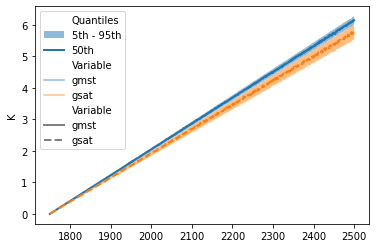

In [4]:
# NBVAL_IGNORE_OUTPUT
start.plumeplot(
    quantile_over="ensemble_member", hue_var="variable", hue_label="Variable"
)

However, we can cast to an xarray DataSet and then all the xarray methods become available too.

In [5]:
# NBVAL_IGNORE_OUTPUT
xr_ds = start.to_xarray(dimensions=("ensemble_member",))
xr_ds

<xarray.Dataset>
Dimensions:          (time: 751, ensemble_member: 100)
Coordinates:
  * time             (time) object 1750-01-01 00:00:00 ... 2500-01-01 00:00:00
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
Data variables:
    gmst             (ensemble_member, time) float64 0.0 0.008333 ... 6.085
    gsat             (ensemble_member, time) float64 0.0 0.007779 ... 5.611
Attributes:
    scmdata_metadata_region:    World
    scmdata_metadata_scenario:  a_scenario
    scmdata_metadata_model:     a_model

For example, calculating statistics.

In [6]:
# NBVAL_IGNORE_OUTPUT
xr_ds.median(dim="ensemble_member")

<xarray.Dataset>
Dimensions:  (time: 751)
Coordinates:
  * time     (time) object 1750-01-01 00:00:00 ... 2500-01-01 00:00:00
Data variables:
    gmst     (time) float64 0.0 0.008207 0.01636 0.02453 ... 6.141 6.153 6.14
    gsat     (time) float64 0.0 0.007664 0.01542 0.02312 ... 5.735 5.76 5.763

Plotting timeseries.

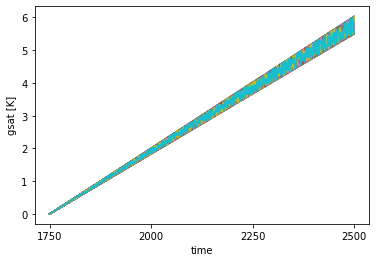

In [7]:
# NBVAL_IGNORE_OUTPUT
xr_ds["gsat"].plot.line(hue="ensemble_member", add_legend=False);

Selecting and plotting timeseries.

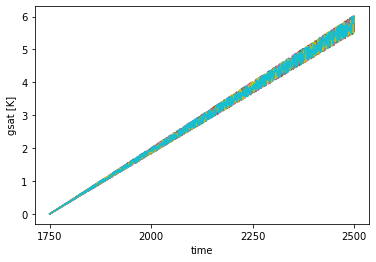

In [8]:
# NBVAL_IGNORE_OUTPUT
xr_ds["gsat"].sel(ensemble_member=range(10)).plot.line(
    hue="ensemble_member", add_legend=False
);

Scatter plots.

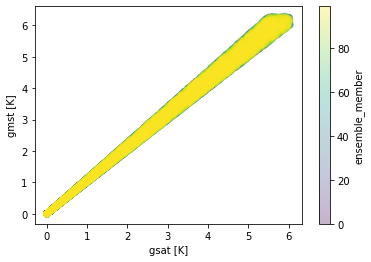

In [9]:
# NBVAL_IGNORE_OUTPUT
xr_ds.plot.scatter(x="gsat", y="gmst", hue="ensemble_member", alpha=0.3)

Or combinations of calculations and plots.

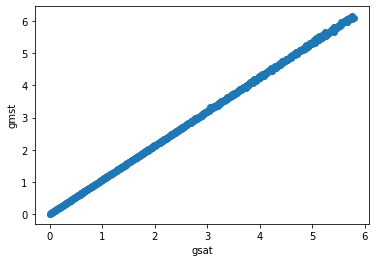

In [10]:
# NBVAL_IGNORE_OUTPUT
xr_ds.median(dim="ensemble_member").plot.scatter(x="gsat", y="gmst")